## Importing Packages

In [1]:
from pyrosm import get_data, OSM
from pyrosm.data import sources
import os
import pandas as pd
from sqlalchemy import create_engine

### Functions

In [2]:
def get_location(location, folder, directory):
    """
    Function to get the location (OSM data) from http://download.geofabrik.de/
    checks whether the location is already downloaded or not, if not downloaded, 
    downloads the location
    
    Parameters
    __________
    location: string variable used to save the name of the location
    folder: folder to use to check if the file is found here
    directory: folder to save the file to when downloading a new file
    
    Returns
    _______
    loc_data: location of the file whether it was downloaded or already in the folder
    """
    
    if location in folder.format(location):
        print('File already in folder')
        loc_data = get_data(location, directory = directory)
        return loc_data
    elif location not in folder.format(location):
        print('Downloading data')
        loc_data = get_data(location, directory = directory)
        return loc_data

In [3]:
def unique_cols(df):
    """
    Function to check whether the values in a dataframe's columns are unique
    
    Parameters
    __________
    df: dataframe to do operations on
    
    Returns
    _______
    Unique columns
    """
    a = df.to_numpy()
    return (a[0] == a).all(0)

In [4]:
def col_names(df):
    """
    Function that gets the names of the columns in a dataframe and the number of columns
    
    Parameters
    __________
    df: dataframe to use
    
    Returns
    _______
    keys: names of dataframe columns
    len_keys: number of dataframe columns
    """
    
    keys = df.columns
    len_keys = len(keys)
    return keys, len_keys

In [5]:
def drop_cols(df, col_names):
    """
    Function to drop column names from a dataframe. Creates a copy of the input df
    
    Parameters
    __________
    df: input dataframe
    col_names: list of column names
    
    Returns
    _______
    dropped_cols_df: copy of input df without dropped columns
    """
    
    dropped_cols_df = df.drop(col_names, inplace = False, axis = 1)
    return dropped_cols_df

In [6]:
def rename_cols(df, col_dict):
    """
    Function to rename column names of a dataframe
    
    Parameters
    __________
    df: dataframe to do operations on
    col_dict: dictionary of exisiting column names with their replacements
    
    Returns
    _______
    df: dataframe after renaming columns
    """
    
    df.rename(columns = col_dict, inplace = True)
    return df

In [7]:
def convert_timestamp(df, col_name, time_unit):
    """
    Function to convert timestamp from a long sequence of ints into datetime format
    
    Parameters
    __________
    df: dataframe to update
    col_name: name of the column to change
    time_unit: what type of time unit it should be, e.g. s for seconds
    
    Returns
    _______
    df: updated dataframe
    """
    
    df[col_name] = pd.to_datetime(df[col_name], unit = time_unit)
    return df

In [8]:
def df_to_file(df, file_name, encoding, folder):
    """
    Function to create a file from the dataframe. The user specifies what file type it should be
    
    Parameters
    __________
    df: dataframe to save to file
    file_name: name of the new saved file
    encoding: what type of encoding should be used for the file if applicable
    folder: used to check whether the file already exists
    
    Returns
    _______
    exported_file: the newly created file
    """
    
    isExist = os.path.exists(folder + '/' + file_name)
    if isExist == True:
        print('This file already exists. Consider changing the name of the file')
    else:
        if '.csv' in file_name:
            exported_file = df.to_csv(file_name, encoding = encoding)
        elif '.parquet' in file_name:
            exported_file = df.to_parquet(file_name)
        return exported_file

### Main program

In [9]:
location = 'greater london'
maps_folder = r'C:\Users\Trym\Documents\Job Related Files\Grasp Labs Case\Maps\{}-latest.osm.pbf'
directory = r'C:\Users\Trym\Documents\Job Related Files\Grasp Labs Case\Maps'

loc_obj = get_location(location, maps_folder, directory)
# Initialize the OSM object 
osm = OSM(loc_obj)

File already in folder


<AxesSubplot:>

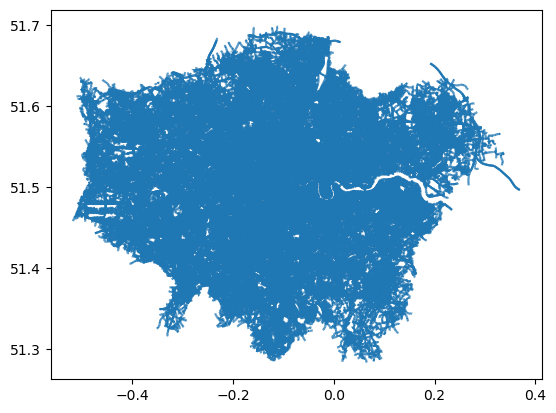

In [10]:
loc_net = osm.get_network(network_type = "all") #Location Network
loc_net.plot()

In [11]:
loc_net.head(5)

access  area bicycle bridge busway cycleway est_width  foot footway  \
0   None  None    None   None   None     None      None  None    None   
1   None  None    None   None   None     None      None  None    None   
2   None  None    None   None   None     None      None  None    None   
3   None  None    None   None   None     None      None  None    None   
4   None  None    None   None   None     None      None  None    None   

       highway  ... tunnel  turn width   id   timestamp version  \
0      primary  ...   None  None  None   74  1548165504       9   
1      primary  ...   None  None  None   75  1358874364      10   
2      primary  ...   None  None  None   79  1501177066      28   
3      primary  ...   None  None  None  482  1584526373      20   
4  residential  ...   None  None  None  488  1620301750      13   

                         tags osm_type  \
0       {"abutters":"retail"}      way   
1       {"abutters":"retail"}      way   
2                        None      way   
3                        None      way   
4  {"abutters":"residential"}      way   

                                            geometry length  
0  MULTILINESTRING ((-0.19312 51.60172, -0.19297 ...   18.0  
1  MULTILINESTRING ((-0.17679 51.61732, -0.17679 ...   62.0  
2  MULTILINESTRING ((-0.19799 51.59712, -0.19778 ...  672.0  
3  MULTILINESTRING ((-0.16075 51.67152, -0.16070 ...  294.0  
4  MULTILINESTRING ((-0.18865 51.64062, -0.18862 ...   13.0  

[5 rows x 41 columns]

In [12]:
print(col_names(loc_net))

(Index(['access', 'area', 'bicycle', 'bridge', 'busway', 'cycleway',
       'est_width', 'foot', 'footway', 'highway', 'int_ref', 'junction',
       'lanes', 'lit', 'maxspeed', 'motorcar', 'motorroad', 'motor_vehicle',
       'name', 'oneway', 'overtaking', 'path', 'passing_places', 'psv', 'ref',
       'service', 'segregated', 'sidewalk', 'smoothness', 'surface',
       'tracktype', 'tunnel', 'turn', 'width', 'id', 'timestamp', 'version',
       'tags', 'osm_type', 'geometry', 'length'],
      dtype='object'), 41)


In [13]:
print(unique_cols(loc_net))

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False]


In [14]:
col_names = ['access', 'area', 'bicycle', 'bridge', 'busway', 'cycleway', 'est_width', 'service', 'oneway',
               'foot', 'footway', 'int_ref', 'junction', 'lanes', 'lit', 'path', 'psv', 'segregated', 'maxspeed',
                'motorcar', 'motorroad', 'motor_vehicle', 'overtaking', 'passing_places', 'sidewalk', 'highway',
                'smoothness', 'surface', 'tracktype', 'tunnel', 'turn', 'width']

df = drop_cols(loc_net, col_names)
df.head()

name    ref   id   timestamp  version  \
0     Ballards Lane   A598   74  1548165504        9   
1         High Road  A1000   75  1358874364       10   
2     East End Road   A504   79  1501177066       28   
3  Cockfosters Road   A111  482  1584526373       20   
4       Western Way   None  488  1620301750       13   

                         tags osm_type  \
0       {"abutters":"retail"}      way   
1       {"abutters":"retail"}      way   
2                        None      way   
3                        None      way   
4  {"abutters":"residential"}      way   

                                            geometry  length  
0  MULTILINESTRING ((-0.19312 51.60172, -0.19297 ...    18.0  
1  MULTILINESTRING ((-0.17679 51.61732, -0.17679 ...    62.0  
2  MULTILINESTRING ((-0.19799 51.59712, -0.19778 ...   672.0  
3  MULTILINESTRING ((-0.16075 51.67152, -0.16070 ...   294.0  
4  MULTILINESTRING ((-0.18865 51.64062, -0.18862 ...    13.0

In [15]:
col_types = df.dtypes
print('The column types are:')
print(col_types)

The column types are:
name           object
ref            object
id              int64
timestamp       int64
version          int8
tags           object
osm_type       object
geometry     geometry
length        float64
dtype: object


In [16]:
col_dict = {'name': 'Address', 'ref': 'reference_id', 'id': 'ID'}
df = rename_cols(df, col_dict)
df.head()

Address reference_id   ID   timestamp  version  \
0     Ballards Lane         A598   74  1548165504        9   
1         High Road        A1000   75  1358874364       10   
2     East End Road         A504   79  1501177066       28   
3  Cockfosters Road         A111  482  1584526373       20   
4       Western Way         None  488  1620301750       13   

                         tags osm_type  \
0       {"abutters":"retail"}      way   
1       {"abutters":"retail"}      way   
2                        None      way   
3                        None      way   
4  {"abutters":"residential"}      way   

                                            geometry  length  
0  MULTILINESTRING ((-0.19312 51.60172, -0.19297 ...    18.0  
1  MULTILINESTRING ((-0.17679 51.61732, -0.17679 ...    62.0  
2  MULTILINESTRING ((-0.19799 51.59712, -0.19778 ...   672.0  
3  MULTILINESTRING ((-0.16075 51.67152, -0.16070 ...   294.0  
4  MULTILINESTRING ((-0.18865 51.64062, -0.18862 ...    13.0

In [17]:
col_name = 'timestamp'
time_unit = 's'

df = convert_timestamp(df, col_name, time_unit)
display(df.head())

Address reference_id   ID           timestamp  version  \
0     Ballards Lane         A598   74 2019-01-22 13:58:24        9   
1         High Road        A1000   75 2013-01-22 17:06:04       10   
2     East End Road         A504   79 2017-07-27 17:37:46       28   
3  Cockfosters Road         A111  482 2020-03-18 10:12:53       20   
4       Western Way         None  488 2021-05-06 11:49:10       13   

                         tags osm_type  \
0       {"abutters":"retail"}      way   
1       {"abutters":"retail"}      way   
2                        None      way   
3                        None      way   
4  {"abutters":"residential"}      way   

                                            geometry  length  
0  MULTILINESTRING ((-0.19312 51.60172, -0.19297 ...    18.0  
1  MULTILINESTRING ((-0.17679 51.61732, -0.17679 ...    62.0  
2  MULTILINESTRING ((-0.19799 51.59712, -0.19778 ...   672.0  
3  MULTILINESTRING ((-0.16075 51.67152, -0.16070 ...   294.0  
4  MULTILINESTRING ((-0.18865 51.64062, -0.18862 ...    13.0

In [18]:
col_types = df.dtypes
print('The column types are:')
print(col_types)

The column types are:
Address                 object
reference_id            object
ID                       int64
timestamp       datetime64[ns]
version                   int8
tags                    object
osm_type                object
geometry              geometry
length                 float64
dtype: object


In [19]:
file_name = 'London_OSM_Updated.csv'
encoding = 'utf-8'
file_folder = 'C:/Users/Trym/Documents/Job Related Files/Grasp Labs Case'
export_file = df_to_file(df, file_name, encoding, file_folder)

This file already exists. Consider changing the name of the file
